In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns



In [5]:
agency=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\DAP\metro\agency.txt')
calendar=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\DAP\metro\calendar.txt')
route=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\DAP\metro\routes.txt')
shape=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\DAP\metro\shapes.txt')
stop_time=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\DAP\metro\stop_times.txt')
stop=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\DAP\metro\stops.txt')
trip=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\DAP\metro\trips.txt')

In [6]:
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


In [7]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231
1,saturday,0,0,0,0,0,1,0,20190101,20251231
2,sunday,0,0,0,0,0,0,1,20190101,20251231


In [8]:
route.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,31,NaN,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,29,NaN,P_MS_R,PINK_Shiv Vihar to Majlis Park,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,M_JB,MAGENTA_Janak Puri West to Botanical Garden,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,P_MS,PINK_Majlis Park to Shiv Vihar,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
shape.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857


In [10]:
stop_time.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.000,1,NaN,NaN
1,0,05:30:58,05:31:18,20,1,NaN,0,0,1202.405,1,NaN,NaN
2,0,05:33:28,05:33:48,19,2,NaN,0,0,2480.750,1,NaN,NaN
3,0,05:35:33,05:35:53,18,3,NaN,0,0,3314.936,1,NaN,NaN
4,0,05:37:53,05:38:13,17,4,NaN,0,0,4300.216,1,NaN,NaN


In [11]:
stop.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon
0,1,NaN,Dilshad Garden,NaN,28.675991,77.321495
1,2,NaN,Jhilmil,NaN,28.675648,77.312393
2,3,NaN,Mansrover park,NaN,28.675352,77.301178
3,4,NaN,Shahdara,NaN,28.673531,77.287270
4,5,NaN,Welcome,NaN,28.671986,77.277931


In [12]:
trip.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0


EDA

Plotting the geographical paths of different routes on a map to visualize how the Delhi Metro covers the area

In [13]:
shape.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857


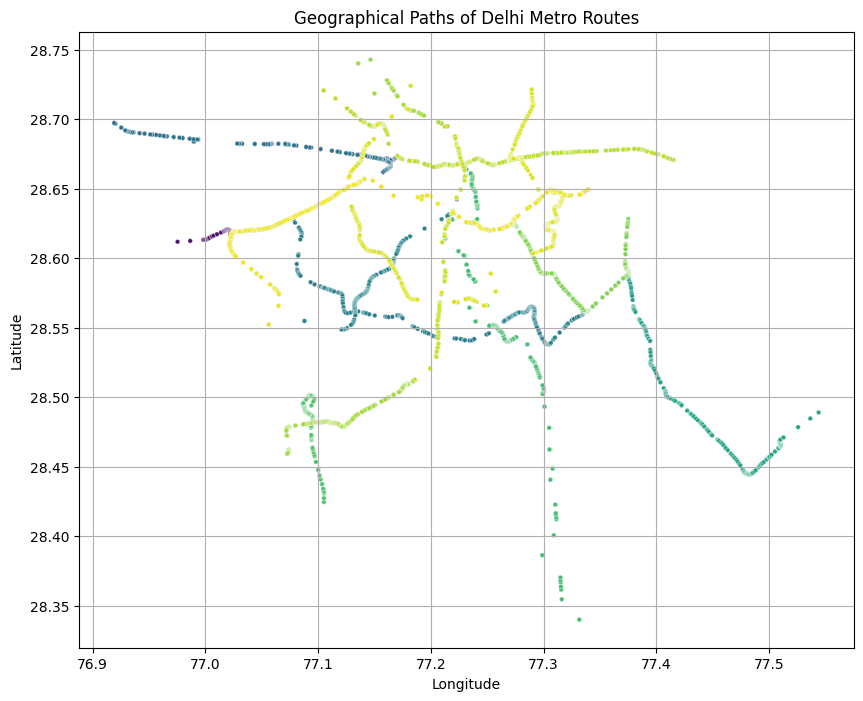

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='shape_pt_lon',y='shape_pt_lat',hue='shape_id',data=shape,palette='viridis',s=10,legend=None)
plt.title('Geographical Paths of Delhi Metro Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

 trips across different days of the week by analyzing the calendar and trip data

In [18]:
trip_calender=pd.merge(trip,calendar,on='service_id',how='left')
trip_calender.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0,1,1,1,1,1,0,0,20190101,20251231
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0,1,1,1,1,1,0,0,20190101,20251231
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0,1,1,1,1,1,0,0,20190101,20251231
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0,1,1,1,1,1,0,0,20190101,20251231
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0,1,1,1,1,1,0,0,20190101,20251231


In [19]:
trip_counts=trip_calender[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()
trip_counts

monday       5379
tuesday      5379
wednesday    5379
thursday     5379
friday       5379
saturday       59
sunday          0
dtype: int64

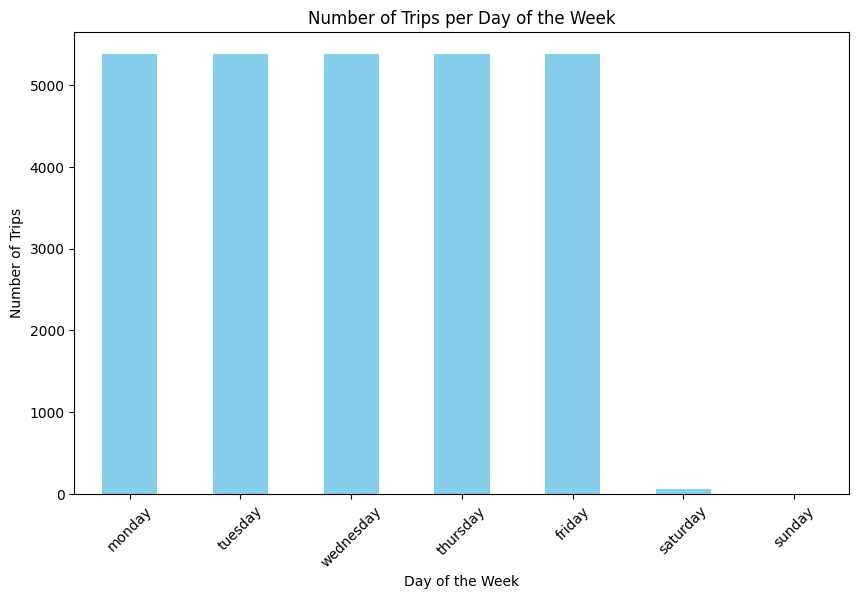

In [22]:
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

analyze the distribution and connectivity of stops

In [23]:
stop.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon
0,1,NaN,Dilshad Garden,NaN,28.675991,77.321495
1,2,NaN,Jhilmil,NaN,28.675648,77.312393
2,3,NaN,Mansrover park,NaN,28.675352,77.301178
3,4,NaN,Shahdara,NaN,28.673531,77.287270
4,5,NaN,Welcome,NaN,28.671986,77.277931


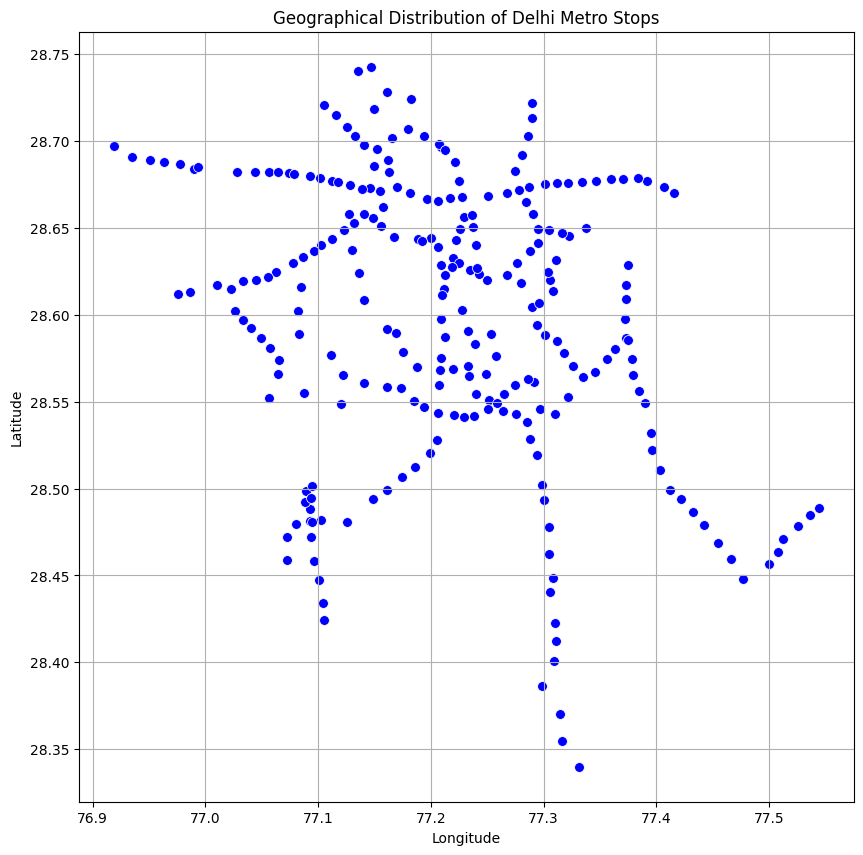

In [29]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', data=stop, color='blue', s=50, marker='o')
plt.title('Geographical Distribution of Delhi Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

How many routes pass through each stop, which can highlight key transfer points and central hubs within the Delhi Metro network

In [30]:
stops_with_route=(stop_time.merge(trip,on='trip_id').merge(route,on='route_id'))

In [31]:
stop_route_counts = (
    stops_with_route
    .groupby('stop_id', as_index=False)
    .agg(number_of_routes=('route_id', 'nunique'))
)


In [32]:
stop_route_counts = stop_route_counts.merge(stop, on='stop_id')

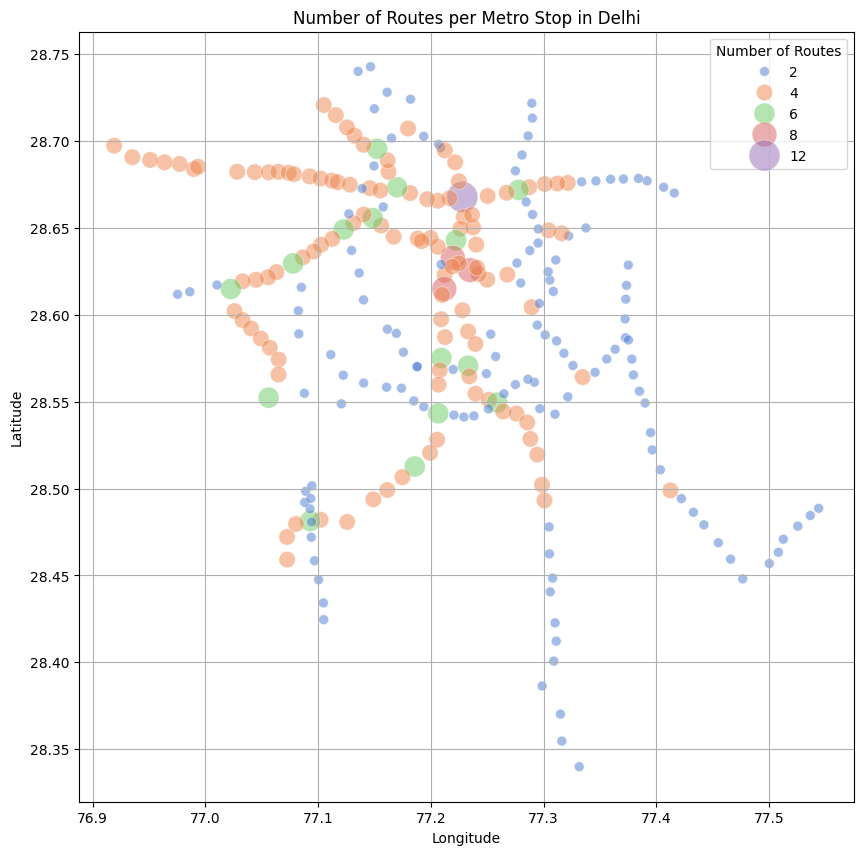

In [37]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='stop_lon',
    y='stop_lat',
    size='number_of_routes',
    hue='number_of_routes',
    sizes=(50, 500),
    alpha=0.5,
    palette='muted',
    data=stop_route_counts
)
plt.title('Number of Routes per Metro Stop in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Routes')
plt.grid(True)
plt.show()

calculate and visualize these intervals:

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_13648\4011014932.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_13648\4011014932.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




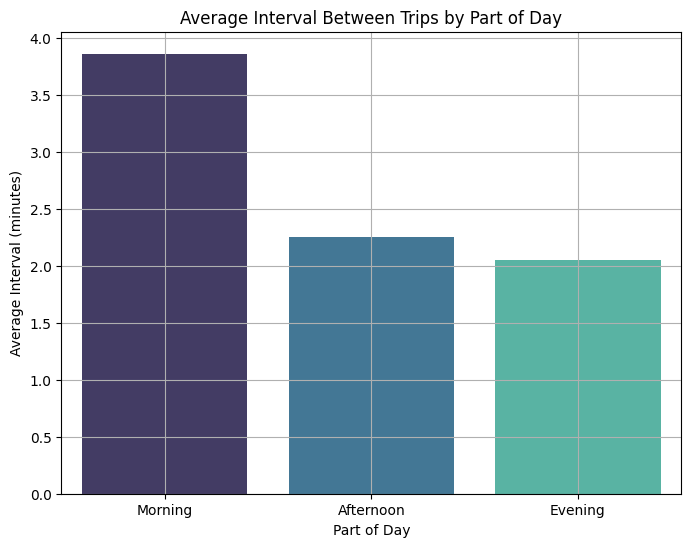

In [38]:
# converting stop_times 'arrival_time' from string to datetime.time for easier manipulation
import datetime as dt

# function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

stop_time['arrival_time_dt'] = stop_time['arrival_time'].apply(convert_to_time)

# calculate the difference in arrival times for subsequent trips at each stop
stop_times_sorted = stop_time.sort_values(by=['stop_id', 'arrival_time_dt'])
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

# function to calculate the difference in minutes between two times
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

# drop NaN values from intervals (last trip of the day)
stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes'])

# average intervals by time of day (morning, afternoon, evening)
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')
plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_13648\4006364041.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




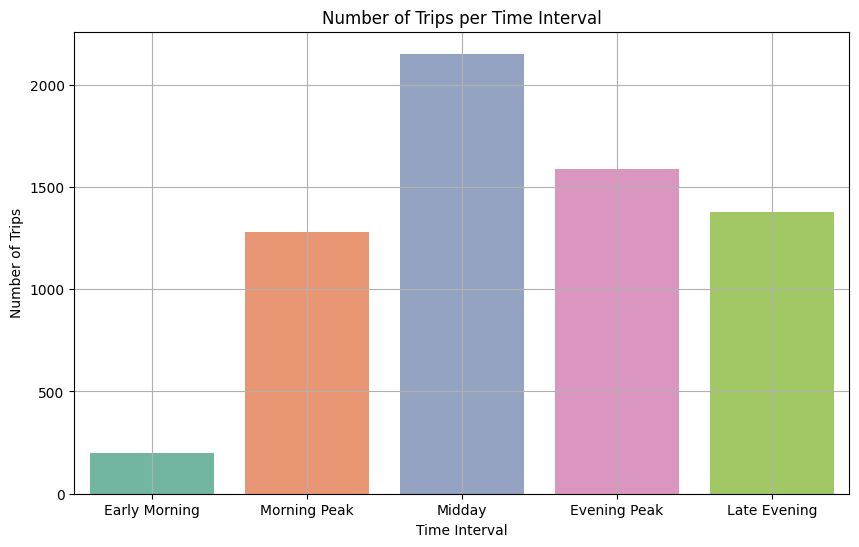

In [39]:
# define time intervals for classification
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'

# apply time interval classification
stop_time['time_interval'] = stop_time['arrival_time_dt'].apply(classify_time_interval)

# count the number of trips per time interval
trips_per_interval = stop_time.groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

# sorting the dataframe
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)
trips_per_interval = trips_per_interval.sort_values('time_interval')

# plotting the number of trips per time interval
plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

Optimizing Operations to Reduce Overcrowding in Metro

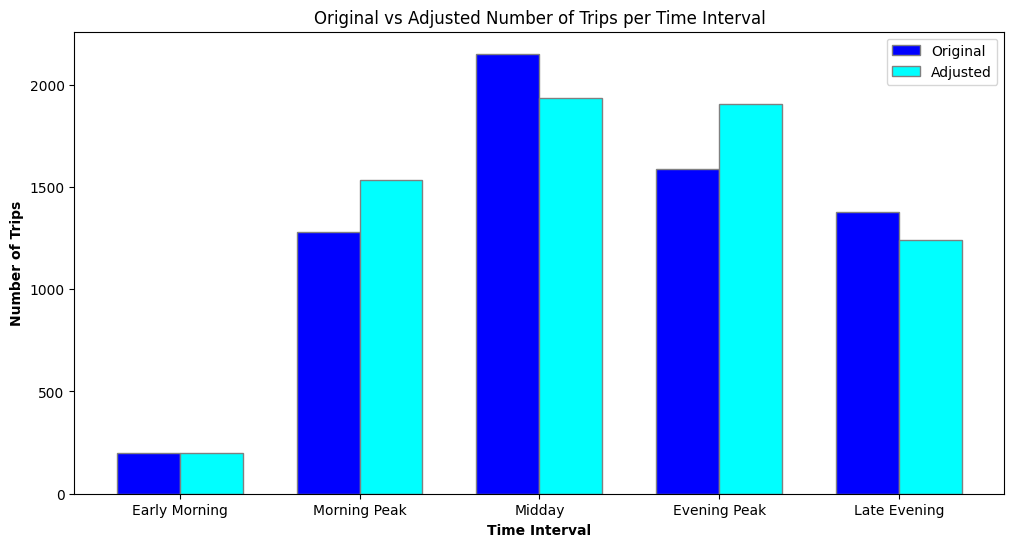

In [40]:
# adjusting frequencies based on hypothetical scenario
adjusted_trips_per_interval = trips_per_interval.copy()
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.90, 'Early Morning': 1.0, 'Late Evening': 0.90}

# apply the adjustments
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

# plotting original vs adjusted number of trips per time interval
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_trips_per_interval['number_of_trips'], color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], color='cyan', width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()

plt.show()